#### Basic imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks

# this function allows the one hot encoding of labels
from keras.utils import to_categorical 

# this module has the imdb data set
from keras.datasets import imdb

# this allows the preprocessing of text into a list of binary inputs
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


#### Load and visualize the data

In [2]:
# Load the train and test data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

print(train_data.shape)
print(len(train_data[0]))

# The data set contains a review, and the sentiment of the review: either positive, 1, or negative, 0.
print(train_data[0])
print(train_labels[0])


(25000,)
218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [3]:
# Using a word dictionary, we can decode the integer message
word_index = imdb.get_word_index()

# The dictionary's key is the word, and its frequency ranking is its value. For simplicity
# we swap them using list comprehention
reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

# The first 3 indices are reserved for the following values. That is why we need to pad the values by 3
reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in train_data[0]])

print(decoded_review)

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNKNOWN> is an amazing actor and now the same being director <UNKNOWN> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNKNOWN> and would recommend it to everyone to watch and the fly <UNKNOWN> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNKNOWN> to the two little <UNKNOWN> that played the <UNKNOWN> of norman and paul they were just brilliant children are often left out of the <UNKNOWN> list i think because the stars that play them all grown up are such a big <UNKNOWN> for the whole film but these children are amazi

#### Standardize and one hot encode the data

In [4]:
# Turning the output into vector mode, each of length 5000
tokenizer = Tokenizer(num_words=5000)
train_data_token = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_data_token = tokenizer.sequences_to_matrix(test_data, mode='binary')
print(train_data_token.shape)
print(test_data_token.shape)

# One-hot encoding the output
num_classes = 2
one_hot_train_labels = to_categorical(train_labels, num_classes)
one_hot_test_labels = to_categorical(test_labels, num_classes)
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)

# Creating a validation set with the first 10000 reviews
validation_data = train_data_token[:10000]
validation_labels = one_hot_train_labels[:10000]

# Creating the input set
x_data = train_data_token[10000:]
y_data = one_hot_train_labels[10000:]
print(x_data.shape)
print(y_data.shape)

(25000, 5000)
(25000, 5000)
(25000, 2)
(25000, 2)
(15000, 5000)
(15000, 2)


#### Build and train the model

In [5]:
# Building the model architecture
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=5000))
# Added dropout between the input and first hidden layer
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
# Added dropout between the first hidden layer and the second one
model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               640128    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 648,514
Trainable params: 648,514
Non-trainable params: 0
_________________________________________________________________


In [6]:
# You can manually create and add the validation set, or...
'''history = model.fit(x_data, y_data,
          batch_size=512,
          epochs=40,
          validation_data=(validation_data, validation_labels), 
          verbose=2)
          '''

# You can let keras make it for you by telling it which percetage of the train data
# will be used as validation. In this case through the validation_split argument.
# Here, it is taking 20% of the train data to use for validation.
history = model.fit(train_data_token, one_hot_train_labels,
          batch_size=512,
          epochs=40,
          validation_split=0.2,
          callbacks=[early_stop], 
          verbose=2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/40
 - 2s - loss: 0.4852 - acc: 0.7656 - val_loss: 0.3355 - val_acc: 0.8600
Epoch 2/40
 - 1s - loss: 0.2926 - acc: 0.8844 - val_loss: 0.3190 - val_acc: 0.8678
Epoch 3/40
 - 1s - loss: 0.2297 - acc: 0.9096 - val_loss: 0.2752 - val_acc: 0.8888
Epoch 4/40
 - 1s - loss: 0.1899 - acc: 0.9272 - val_loss: 0.2834 - val_acc: 0.8854
Epoch 5/40
 - 1s - loss: 0.1522 - acc: 0.9426 - val_loss: 0.2924 - val_acc: 0.8870
Epoch 6/40
 - 1s - loss: 0.1152 - acc: 0.9591 - val_loss: 0.3589 - val_acc: 0.8876
Epoch 7/40
 - 1s - loss: 0.0911 - acc: 0.9671 - val_loss: 0.3506 - val_acc: 0.8868
Epoch 8/40
 - 1s - loss: 0.0604 - acc: 0.9797 - val_loss: 0.4046 - val_acc: 0.8810


#### Evaluate the model, and plot the validation and accuracy

In [7]:
# Evaluating the model with the test data
results = model.evaluate(test_data_token, one_hot_test_labels)

print(results)

25000/25000 [==============================] - 3s 115us/step
[0.4302939310097694, 0.869]


In [8]:
# This dictionary stores the validation and accuracy of the model throughout the epochs
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [9]:
# The history values are split in different lists for ease of plotting
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

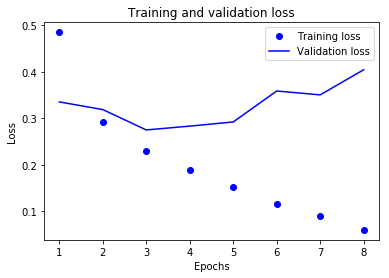

In [10]:
# Plot of the validation and training loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

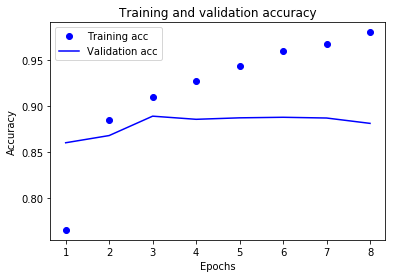

In [11]:
# Plot of the validation and train accuracy

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()